In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler, Normalizer


pd.set_option('display.max_columns', None)

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']
path = "../data/"

## Developing a Classifier in Complete Dataset

In [3]:
# Obtained from Optimization
min_subset_ids = pd.read_csv(path+"R_ids_alpha_0.6357.csv")

DB2P8 = pd.read_csv(path+"DB2P8.csv")
DB5 = pd.read_csv(path+"DB5.csv")
DB2 = DB2P8[DB5.columns] # Because DB2P8 has more columns than DB5

# There is two shots from DB2P8 missing in DB5
missing_shots = DB2[~DB2.id.isin( DB5.id.values )].reset_index(drop=True)
DB5 = pd.concat([DB5, missing_shots], axis=0, ignore_index=True)

# Labeling shots that had great impact in decreasing alpha_R
DB5.insert(loc=2,column="label",value=[-1]*len(DB5))
DB5.loc[(DB5[DB5.id.isin(min_subset_ids.id)].index), "label"] = 1

print(
    f"{ round( (len(min_subset_ids)/len(DB5))*100     ,2)  }% of the data decreased alpha_R\n" + 
    f"{ round( (1 - len(min_subset_ids)/len(DB5))*100 ,2)  }% of the data did not decrease alpha_R"
)

23.45% of the data decreased alpha_R
76.55% of the data did not decrease alpha_R


Class distribution can be considered almost severly skewed.

In [4]:
features = ['TAUTH','NEL','RGEO','BT','RHOSTAR','NUSTAR','BETASTAR']
DB5.columns

Index(['ind', 'id', 'label', 'PHASE', 'TOK', 'IP', 'BT', 'NEL', 'PLTH', 'RGEO',
       'KAREA', 'EPS', 'MEFF', 'TAUTH', 'DATE', 'SHOT', 'TIME', 'Q95', 'ZEFF',
       'AMIN', 'VOL', 'POHM', 'PNBI', 'DWDIA', 'DWMHD', 'PICRH', 'PECRH', 'PL',
       'PFLOSS', 'TAV', 'LCOULOMB', 'QCYL5', 'TAUBOHM', 'RHOSTAR', 'BETASTAR',
       'NUSTAR', 'OMEGACYCL'],
      dtype='object')

### On the Metrics: What do you want to predict? 

Notes on [[Jason Browniee, 2020]](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/)

* **PROBABILITIES**
    * If only probabilities needed: Brier Score
    * **With class label, if minority class is more important: PR AUC**
    * With class label, if both classes are equally important: ROC AUC
* **CLASS LABELS**
    * Both classes are euqally important: G-Mean
        * Not so severely skewed data: Accuracy
    * If minority class is more important: 
        * Both false positive and false negative are equally costly: F1 Score
        * False positives (minority) are more costly: F0.5 Score
        * False negatives (majority) are more costly: F2 Score
        
### Spot-Check on ML Algorithms


1. Linear Algorithms
2. Nonlinear Algorithms
3. Ensemble Algorthms
4. **Data Sampling Algorithms**
5. **One-Class Algorithms** (specialized on severely imbalanced datasets)
    * [A One-Class Classification Decision Tree Based on Kernel Density Estimation](https://arxiv.org/abs/1805.05021)

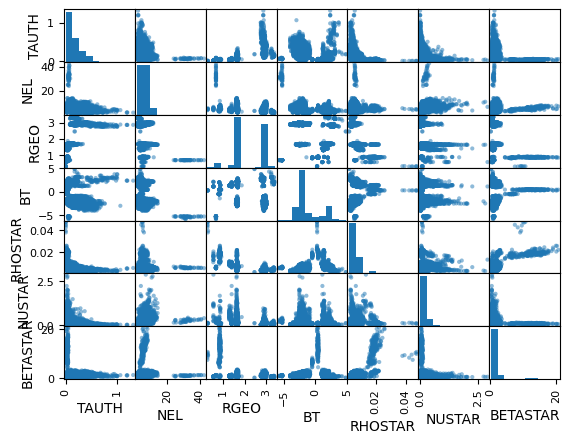

In [17]:
pd.plotting.scatter_matrix(DB5[features]);

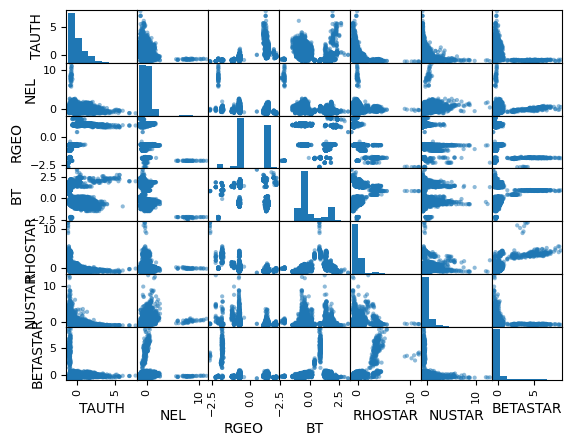

In [8]:
x = pd.DataFrame(StandardScaler().fit_transform( DB5[features] ), columns = features)
pd.plotting.scatter_matrix(x);

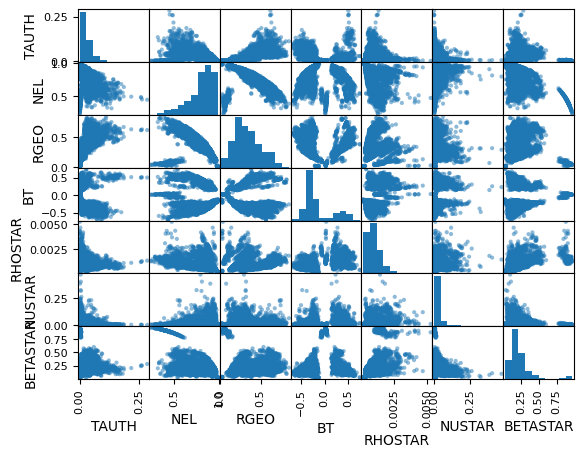

In [14]:
x = pd.DataFrame(Normalizer().fit_transform( DB5[features] ), columns = features)
pd.plotting.scatter_matrix(x);

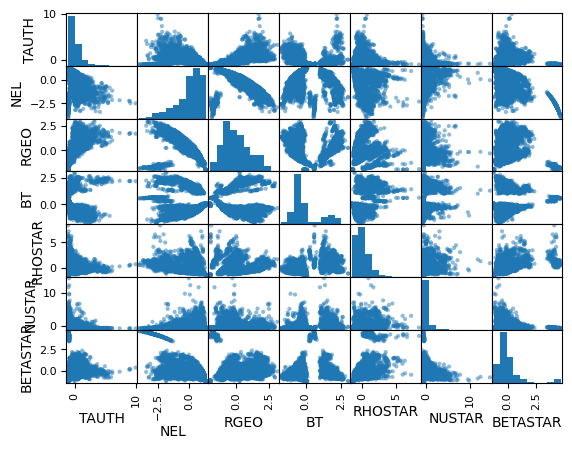

In [13]:
x = pd.DataFrame(Normalizer().fit_transform( DB5[features] ), columns = features)
x = pd.DataFrame(StandardScaler().fit_transform( x ), columns = features)
pd.plotting.scatter_matrix(x);

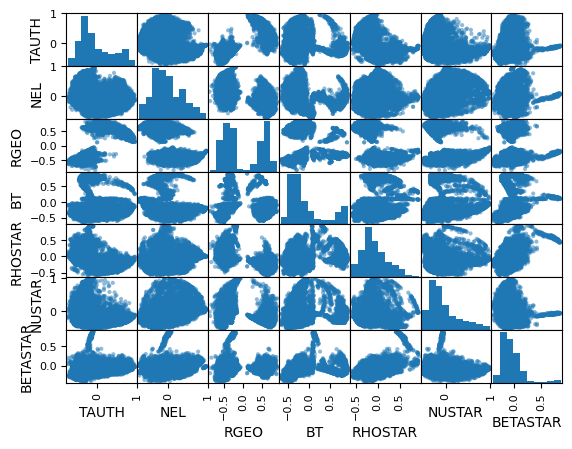

In [15]:
x = pd.DataFrame(StandardScaler().fit_transform( DB5[features] ), columns = features)
x = pd.DataFrame(Normalizer().fit_transform( x ), columns = features)
pd.plotting.scatter_matrix(x);